# Preprocessing Raw Text Data

## Categorical Data


Cleaning and "Massaging" data takes, by far, the most time during data analysis; it's also the task that people enjoy the least!  

[![](https://imageio.forbes.com/blogs-images/gilpress/files/2016/03/Time-1200x511.jpg?format=jpg&width=600)](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/)
[![](https://imageio.forbes.com/blogs-images/gilpress/files/2016/03/Least-Enjoyable4-1200x511.jpg?format=jpg&width=600)](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/)

It can be tempting, then, to try and skip over the data cleaning steps and jump straight to the more-interesting parts of data analysis, like model fitting, statistics, and data visualization, especially in cases where the data is *almost* ready.
Of course, not everything needs to be pristine before starting those steps, but the more quickly you can go through the standard steps of data cleaning, the more time you'll spend getting results from your data.

## Dataset: Education Factors from Census Dataset

What level of degree do people have
Here, we'll look at some features of pandas that help with data cleaning, namely:
  
  - **Downloading the Data, Converting String to File-Like Object**: `r = requests.get(url); f = io.StringIO(r.text)`
  - **Reading in Data Properly**: `pd.read_csv(, header=, sep=, decimal=)`
  - **Adding Variable Metadata**: `df.columns = []`, `pd.read_csv(header=)`
  - **Cleaning Labels**: `df.rename(columns=fun)`, `df.c`
  - **Coding Missing/Placeholder Values**: `pd.read_csv(na_values=)`
  - **Assigning Correct Datatypes**: `df.astype()`
  - **Coding Categorical Variables**: `pd.Categorical()`
  - **Storing Cleaned Data**: `pd.to_feather()`, `pd.to_parquet()`
  
  
**Dataset Link**: https://archive-beta.ics.uci.edu/ml/datasets/census+income



#### Scenario

In a department meeting, I shared a crosstabulation (below) on our census data, showing how many people of each education level and job type
was in the dataset.

The feedback from my coworkers was, shall we say, critical:

  - **New Team Member**: "I don't understand--which variables were you showing here?"
  - **Elisabeth (Data Analyst)**: "I am trying to see how many people in Craft Repair earned at least a bachelors, but it's really hard to understand from your table.  Can't the education levels be in order?"
  - **Bruce (Manager)**: "I don't like how the job titles look with the dash between the words; it doesn't match our other documents.  Can you replace the dashes with spaces, and make the job titles all upper case?"
  - **Nayeli (Programmer)**: "What are these variables you're referring to, and why are there those weird spaces in the keys?"
  - **Alana (Scientist)**: "The question mark was meant for missing data.  It's interesting, but the missing jobs shouldn't be included in this analysis."
  - **Humberto (Person who collected the data)**: "Are you sure this is all the data?  I set some data aside as a 'test' dataset for the machine learning department, but it should be included in this report."
  - **Desmond (Colleague)**: "Can you give me the data you used, both the raw and processed versions?  I have some questions I want to ask, too."
  
To address all this feedback, we can take two general approaches: by fixing the report, or by going back and improving the data.  Let's get at the root of the problem and improve the data!  

**Exercises**

Redo the analysis from scratch in the the fields below, cleaning the data before building the cross-tabulation.

Take a look at the [dataset website](https://archive-beta.ics.uci.edu/ml/datasets/census+income) (click the "Download" button, and follow the links).  Before you continue the analysis, 
try to learn:

  - Where all the datasets are located (what are their urls?)
  - Where the labels for variables are listed 
  - How missing data is labelled

**1. Download the raw data.** 

*"Can you give me the data you used, both the raw and processed versions?  I have some questions I want to ask, too."*

**Goal**: Put all the raw data into a `data/raw` folder, for later processing. That way you can give it later to Desmond!  Below is a list of functions that may be useful, depending on the approach you want to use:



| **Function** | **Purpose** | **Example** |
| :-----       |  :--------  | :--------   |
| **`pd.read_csv(url)`** | Downloads a CSV from the internet and makes it a DataFrame | `read_csv('https://raw.githubusercontent.com/titanic.csv')` |
| `df.to_csv(filename)` | Saves a CSV from a DataFrame to the computer | `df.to_csv('mydata.csv')`
| -- | -- | -- |
| **`pd.read_csv(file)`** | Takes a file-like object, reads the CSV data from it, and makes a DataFrame | `read_csv(StringIO('a,b\n1,2\n3,4'))`
| `requests.get().text` | Downloads any page off the internet and shows the text contents of the page | `get('https://www.google.com').text` |
| `io.StringIO(text)` | Makes a file-like object from a string  | `StringIO('Hello World').read()` |
| -- | -- | -- |
| **`pd.read_csv(filename)`** | Reads a filename with CSV data on the computer and makes it a DataFrame | `read_csv('myfile.csv')` |
| `open(filename, mode='w').write(text)` | Makes a file object and puts it in "write" mode, then writes text data to the file. | `open('myfile.txt', mode='w').write('Hello!')` |
| `pathlib.Path(filename).write_text(text)` | Writes text data to a file on the computer | `Path('myfile2.txt').write_text('Hi!')` |
| `os.makedirs(dirname, exist_ok=True)` | Create a directory on the computer | `makedirs('scripts', exist_ok=True)` |




In [1]:
import pandas as pd
import requests
from pathlib import Path
import os

In [2]:

resp = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')


In [4]:
os.makedirs('../data/raw', exist_ok=True)
Path('data/raw/adult.data').write_text(resp.text)

3974305

In [7]:
resp = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names')
Path('data/raw/adult.names').write_text(resp.text)

5229

In [3]:
text = Path('data/raw/adult.names').read_text()
names = [line[:line.index(':')] for line in text.splitlines() if not line.startswith('|') and ':' in line]
print(names)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


In [4]:
resp = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test')
Path('data/raw/adult.test').write_text(resp.text)

2003153

Status: *Continue if all the files from the dataset website are in a new folder called 'data/raw'*

**2. Read in the Main Data File as a DataFrame, making sure it is formatted properly.**

*"I don't understand--which variables were you showing here?"*

*"why are there those weird spaces in the keys? And what are these variables you're referring to?  I don't see a variable name."*

*"I don't like how the job titles look with the dash between the words; it doesn't match our other documents.  Can you replace the dashes with spaces, and make the job titles all upper case?"*

| **Function** | **Purpose** | **Example** |
| :-----       |  :--------  | :--------   |
| `pd.read_csv(sep=)` | Specify the seperator character in the text of the CSV file | `read_csv('data.tsv', sep='\t')` |
| `pd.read_csv(header=)` | Specify the row index of the header (or None, if no header in the file) | `read_csv('data.csv', header=3)` |
| --- | --- | --- |
| **`df.columns = []`**  | Set the column names of an already-existing DataFrame (list of strings must be the same length as the existing columns) | `df.columns = ['A', 'B', 'C']` |
| `pathlib.Path(filename).read_text()` | Read the text of a file. | `Path('myfile.txt').read_text()` |
| `str.split(sep)` | Split a string into a list of strings, seperated where specified (note: `\n` means "newline") | `'CGT GTT GCC'.split(' ')` |
| `[] + []` | Make a concatenated list from two other lists. | `['a', 'b'] + ['c']` |
| `list.append(val)` | Concatenate a value to the end of a list | `letters = ['a', 'b']; letters.append('c')` |
| `[fun(string) for string in strings]` | apply the same operation to each string in a list of strings, making a new list | `[s.upper() for s in ['nick', 'yiwen', 'emma']]` |
| --- | --- | --- |
| `pd.Series.str.replace(from, to)` | Replace some substring in a string with another string throughout a column. | `df['Countries'].str.replace('_', ' ')` |
| `pd.DataFrame.rename(columns=fun)` | Use a function to replace the name of every column in the dataset. Often, a lambda function is used here.  | `df.rename(columns=lambda s: s.upper())` |
| `pd.DataFrame.rename(columns=dict)` | Use a dictionary to replace certain column names with others.  | `df.rename(columns={'apple': 'Apple Inc', 'microsoft': 'Microsoft'})` |
| `{value: fun(key) for value in values}` | Make a dictionary from a list of data. | `{name: len(name) for name in ['nick', 'yiwen', 'emma']}` |
.

Read in your raw data as a dataframe, addressing the feedback above by:

  1. Extract Variable names from the file that contains the variable names (preferably not with copy-paste, but by having Python do it.).
  2. Make the variable names title-cased, with a space instead of a dash between the words.
  3. Make the job titles upper-cased, with a space instead of a dash between the words.

In [5]:
df = pd.read_csv('data/raw/adult.data', header=None, sep=', ', na_values='?')
full_names = names + ['Class']
df.columns = [name.title().replace('-', ' ') for name in full_names]
df = df.rename(columns={'Fnlwgt': 'Final Weight'})
df['Education'] = df.Education.str.upper().str.replace('-', ' ')
df.head()

C:\Users\nickdg\AppData\Local\Temp\ipykernel_14172\126877384.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('data/raw/adult.data', header=None, sep=', ', na_values='?')


,Age,Workclass,Final Weight,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Native Country,Class
0,39,State-gov,77516,BACHELORS,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,BACHELORS,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS GRAD,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11TH,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,BACHELORS,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
dft = pd.read_csv('data/raw/adult.test', header=None, sep=', ', na_values='?', skiprows=1)
full_names = names + ['Class']
dft.columns = [name.title().replace('-', ' ') for name in full_names]
dft = dft.rename(columns={'Fnlwgt': 'Final Weight'})
dft['Education'] = df.Education.str.upper().str.replace('-', ' ')
# dft.head()
dft

C:\Users\nickdg\AppData\Local\Temp\ipykernel_14172\1859004627.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dft = pd.read_csv('data/raw/adult.test', header=None, sep=', ', na_values='?', skiprows=1)


,Age,Workclass,Final Weight,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Native Country,Class
0,25,Private,226802,BACHELORS,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,BACHELORS,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,HS GRAD,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,11TH,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,BACHELORS,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,HS GRAD,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,NaN,321403,SOME COLLEGE,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,BACHELORS,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,ASSOC VOC,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [7]:
df['File'] = 'adult.data'
dft['File'] = 'adult.test'
df_all = pd.concat([df, dft], ignore_index=True)
df_all

,Age,Workclass,Final Weight,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Native Country,Class,File
0,39,State-gov,77516,BACHELORS,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,adult.data
1,50,Self-emp-not-inc,83311,BACHELORS,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,adult.data
2,38,Private,215646,HS GRAD,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,adult.data
3,53,Private,234721,11TH,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,adult.data
4,28,Private,338409,BACHELORS,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,adult.data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,HS GRAD,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.,adult.test
48838,64,NaN,321403,SOME COLLEGE,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.,adult.test
48839,38,Private,374983,BACHELORS,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.,adult.test
48840,44,Private,83891,ASSOC VOC,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.,adult.test


In [9]:
df_all.to_csv('alldata.csv', index=False)


In [18]:
df_all = pd.read_csv('alldata.csv')
os.makedirs('data/processed', exist_ok=True)
df_all.to_csv('data/processed/alldata.csv', index=False)
df_all.to_feather('data/processed/alldata.feather')
df_all.to_parquet('data/processed/alldata.parquet')
%ls data\processed

 Volume in drive C is Windows
 Volume Serial Number is 3605-60C0

 Directory of C:\Users\nickdg\Projects\dsworkshop\Day1\notebooks\data\processed

06/07/2022  05:06 PM    <DIR>          .
06/07/2022  05:06 PM    <DIR>          ..
06/07/2022  05:06 PM         5,874,166 alldata.csv
06/07/2022  05:06 PM         3,298,570 alldata.feather
06/07/2022  05:06 PM           528,754 alldata.parquet
               3 File(s)      9,701,490 bytes
               2 Dir(s)  189,752,987,648 bytes free


In [22]:
df_all['Education'].unique()

array(['BACHELORS', 'HS GRAD', '11TH', 'MASTERS', '9TH', 'SOME COLLEGE',
       'ASSOC ACDM', 'ASSOC VOC', '7TH 8TH', 'DOCTORATE', 'PROF SCHOOL',
       '5TH 6TH', '10TH', '1ST 4TH', 'PRESCHOOL', '12TH'], dtype=object)

In [29]:
levels = df_all.groupby('Education')['Education Num'].median().sort_values().index.tolist()
levels

['PRESCHOOL',
 '1ST 4TH',
 '5TH 6TH',
 '7TH 8TH',
 '9TH',
 '10TH',
 '11TH',
 '12TH',
 'HS GRAD',
 'SOME COLLEGE',
 'ASSOC VOC',
 'ASSOC ACDM',
 'BACHELORS',
 'MASTERS',
 'PROF SCHOOL',
 'DOCTORATE']

In [33]:
df_all['Education'] = pd.Categorical(df_all['Education'], categories=levels, ordered=True)
pd.crosstab(df_all.Occupation, df_all.Education).style.background_gradient()

Education,PRESCHOOL,1ST 4TH,5TH 6TH,7TH 8TH,9TH,10TH,11TH,12TH,HS GRAD,SOME COLLEGE,ASSOC VOC,ASSOC ACDM,BACHELORS,MASTERS,PROF SCHOOL,DOCTORATE
Occupation,,,,,,,,,,,,,,,,
Adm-clerical,6,4,19,54,47,92,146,54,1945,1681,237,249,845,170,32,30
Armed-Forces,0,0,0,0,1,0,0,1,5,3,0,0,3,1,0,1
Craft-repair,7,32,64,151,125,213,233,77,2600,1337,349,175,552,128,43,26
Exec-managerial,3,13,25,69,50,86,102,35,1459,1345,238,204,1702,594,83,78
Farming-fishing,9,23,40,78,33,57,50,20,574,308,67,23,158,33,11,6
Handlers-cleaners,4,24,46,56,55,83,149,51,844,435,53,47,162,40,11,12
Machine-op-inspct,14,28,67,123,91,133,133,51,1345,529,105,61,240,76,15,11
Other-service,17,47,78,131,116,244,286,106,1853,1124,178,128,435,122,34,24
Priv-house-serv,2,13,15,8,10,9,18,5,80,39,8,5,20,9,1,0


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

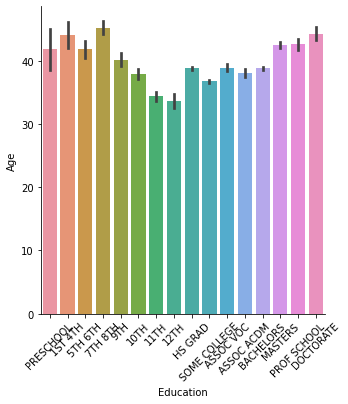

In [44]:
sns.catplot(data=df_all, x='Education', y='Age', kind='bar');
plt.xticks(rotation=45);

In [45]:
df_all.to_parquet('data/processed/alldata.parquet')

In [47]:
pd.read_parquet('data/processed/alldata.parquet').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             48842 non-null  int64   
 1   Workclass       46043 non-null  object  
 2   Final Weight    48842 non-null  int64   
 3   Education       48842 non-null  category
 4   Education Num   48842 non-null  int64   
 5   Marital Status  48842 non-null  object  
 6   Occupation      46033 non-null  object  
 7   Relationship    48842 non-null  object  
 8   Race            48842 non-null  object  
 9   Sex             48842 non-null  object  
 10  Capital Gain    48842 non-null  int64   
 11  Capital Loss    48842 non-null  int64   
 12  Hours Per Week  48842 non-null  int64   
 13  Native Country  47985 non-null  object  
 14  Class           48842 non-null  object  
 15  File            48842 non-null  object  
dtypes: category(1), int64(6), object(9)
memory usage: 5.6+ MB


Status: *Continue if you see "HS GRAD" instead of "hs-grad", "Education Num" instead of "education-num", and an "Income Level" column in the new dataframe*.


**3. Using NaN for Missing Data**

*"The question mark was meant for missing data.  It's interesting, but the missing jobs shouldn't be included in this analysis."*

In text data, it's common for a special character to be used to represent missing data.  Sometimes, a different symbol is used for each variable in the same dataset!  When processing data, it's good to use a symbol that data analysis software recognizes represents missing data.  In python, it's usually `None`, `np.nan`, or Pandas' new `pd.NA` and `pd.NaT` (for the curious, a great description here: https://towardsdatascience.com/nan-none-and-experimental-na-d1f799308dd5)

| Function | Purpose | Example |
| :---- | :---- | :---- |
| `pd.DataFrame.replace(from, to)`  | Replace a value found anywhere in the dataset with another | `df.replace('Missing', pd.NA)` |
| `pd.read_csv(na_values=)` | On reading a CSV, specify which values should be considered missing data | `read_csv('data.csv', na_values='X')` |
| `df.info()` | Show info on each column, including numbers of non-missing data | `df.info()` |
| `df.isna().sum()` | Calculate how many values in each column are missing | `df.isna().sum()` |
| `(df == val).sum()`  | Count all the values that are equal to some value in each column | `(df == 5).sum()` |

Either by building on to the previously-created dataframe or re-making the dataframe  from scratch, address the feedback above by replacing the question marks with missing data labels.

Status: *Continue if you see  lots of missing data in the Native Country column (at least 582 values)*

**4. Concatenating Data Files**

*"Are you sure this is all the data?  I set some data aside as a 'test' dataset for the machine learning department, but it should be included in this report."*

It's good practice to seperate training and test data for machine learning purposes, but it's a challenge to ensure that seperated data is processed in a similar way.  By brining them together early in a pipeline, it also makes it easier to re-split the data according to the needs of the analysis.  In a near-perfect world, all the data in your project would be found in just one dataframe!  

Ideally, we want to both concatenate data and make it easy to split later on.  To do this, practice adding a column that helps identify the group of rows that were originally in each file you concatenate.


| Function | Purpose | Example |
| :-----   | :-----  | :-----  |
| `df.assign(colname=data)` | Add a new column to a DataFrame | `df.assign(A=[1, 2, 3], B=[4, 5, 6])` |
| `df[colname] = data`    | Add a new column to a DataFrame | `df['A'] = [1, 2, 3]` |
| `pd.concat([df1, df2], ignore_index=True)` | Concatenate multiple dataframes that have the same columns | `concat([df1, df2], ignore_index=True)` |


Either by building on to the previously-created dataframe or re-making the dataframe from scratch, address the feedback above by concatenating the "test" dataset with the current one, labelling rows from the current dataset as the "train" group and the others as the "test" group.

**5. Ordering the Categories**

*"I am trying to see how many people in Craft Repair earned at least a bachelors, but it's really hard to understand from your table.  Can't the education levels be in order?"*

There are lots of string data that represent **Categorical** data.  For example, "dog" and "cat" might be a type of pet.  Sometimes, the order of these categories matter (for example, "Monday", "Tuesday", "Wednesday", etc, should always be plotted in order). Not all text data is considered Categorical, though; names of patients, for example, are usually unique, and if two patients have the same name it's not usually interesting.

| Function | Purpose | Example |
| :-----   | :-----  | :------ |
| `pd.Series.unique()` | Get the unique values in a column | `df['Country'].unique()` |
| `pd.Series.astype(dtype)`  | Make a new column with a specific data type | `df['Height'].astype(float)` |
| `pd.DataFrame.astype(dict)` | Make a DataFrame where multiple specified columns are a new data type | `df.astype({'Height': float, 'Weight': np.uint8})` |
| `pd.Series.astype('category')` | Make a Categorical column  | `df.State.astype('category')` |
| `pd.Categorical(values)` | Make an Ordered Categorical column | `df['Genus'] = Categorical(df['Genus'])` |
| `pd.Categorical(values, categories=, ordered=True)` | Make an Ordered Categorical column | `df['DaysOfWeek'] = Categorical(df['DaysOfWeek'], categories=['Mon', 'Tues'], ordered=True)` |
| `pd.CategoricalDType(categories=, ordered=True)` | Make a Categorical data type | `df['DaysOfWeek'].astype(CategoricalDType(categories=['Mon', 'Tues'], ordered=True)` |
| `df.info()` | See memory usage of dataset (categories make it smaller!) | `df.info()` |
| `df.memory_usage(deep=True)` | See memory usage of each column, in Bytes | `df.memory_usage(deep=True) / 1024**2`

Let's address the feedback above by turning the Education level column into an ordered categorical variable.  While we're at it, let's also change other oft-repeating variables into a Categorical data type--the amount of memory the data takes up should be quite small as a result.

Status: *Continue when Education is an ordered category, with each level in its proper order, and Sex is a non-ordered category.*

**6. Exporting the Data in a Round-Trippable Format**

*"Can you give me the data you used, both the raw and processed versions?  I have some questions I want to ask, too.*

Exporting the dataset to file is important; it enables further data analysis in other programs!  But not all filetypes support 
Categorical data, Missing data, and other data types; particularly text file types.  Whatever format you choose, the best situation
is one where the data you *read* is exactly the same as the one you *wrote* (i.e. the data successfully "round-trips" when it is serialized to disk).

| Function | Purpose | Example |
| :-----   | :-----  | :-----  |
| `pd.read_xxx(filename)` | [Read file format 'xxx' to a DataFrame](https://pandas.pydata.org/docs/user_guide/io.html) | `df = read_excel('myfile.xlsx')` |
| `pd.DataFrame.to_xxx(filename)` | [Write DataFrame to file format 'xxx'](https://pandas.pydata.org/docs/user_guide/io.html) | `to_excel('myfile.xlsx')` |
| `pd.DataFrame.to_xxx(filename, index=False)` | Write DataFrame to file format 'xxx', not including the index | `to_parquet('myfile.parquet', index=False)` |
| `os.makedirs(foldname, exist_ok=True)` | Make a folder, not raising an error if it already exists | `makedirs('data/processed', exist_ok=True)` |
| `!dir folder` | Get the filenames in a folder and their size *(Windows only)* | `!dir data/processed` |
| `!ls -lh`  | Get the filenames in a folder and their size *(Mac and Linux)* | `ls -lh data/processed` |

Address the feedback above by saving the DataFrame to the `data/processed` folder, in a format that remembers missing data and categorical data.  Bonus points if the file is really small (smaller files are easier to share!)

**7. Reap the Benefit!  Cross-Tabulation and Pivot Tables**

Now there's much more information in the dataset than there was before; let's take advantage!

One simple visualazation we can do is "Cross-Tabulate" the data; basically, counting the number of instances of each variable.  When there's lots of data, it's a bit hard to interpret; formatting the printed table with a [Style](https://pandas.pydata.org/docs/user_guide/style.html) can be really handy here.  Notice in the table below that Pandas has a lot of ways to do essentially the same thing.


| Function | Purpose | Example |
| :------  | :------ | :------ |
| `pd.crosstab(index=col, columns=col)` | Counts the number of rows of each combination of levels in two clumns | `crosstab(index=df.Month, columns=df.DayOfWeek)` |
| `pd.crosstab(margins=True)` |  Shows the sum totals for each category  |   |
| `pd.crosstab(normalize=True)` | Transform counts into a percentage |   | 
| `df[cols].value_counts()` | Show the counts of each value in the selected columns  | `df[['Month', 'DaysOfWeek']].value_counts()` |
| `df[cols].value_counts().unstack()` | Show the counts of each value in the selected columns, as a Table  | `df[['Month', 'DaysOfWeek']].value_counts().unstack()` |
| `df.groupby(cols).size()` | Show the counts of each value in the selected columns  |  `df.groupby(['Month', 'DaysOfWeek']).size()` |
| --- | ---- | ---- |
| `pd.crosstab(index=col, columns=col, values=col, aggfunc=fun)` | Calculate some statistic for a column, using the function in aggfunc | `crosstab(index=df.Month, columns=df.DayOfWeek, values=df.RainLevel, aggfunc=np.mean)` |
| `df.pivot_table(index='col', columns='col', values='col', aggfunc=fun)` | Calculate some statistic for a column, using the function in aggfunc | `df.pivot_table(index='Month', columns='DayOfWeek', values='RainLevel', aggfunc=np.mean)` |
| --- | --- | ---- |
| `df.style.background_gradient()` | Show a dataframe styled so the background matches the values | `df.style.background_gradient()` |
| `df.style.format(fmt)`  | Format the text that's printed according to a [string formats](https://pyformat.info/) | `df.style.format('{:.2f}')` |
. 


For this section, recreate the original report above, showing how many people there are for each education level and job type.  It should look nicer this time!

Show how many people of each sex and race there were in this dataset

What was the average hours of work for each type of education, seperated by income level?

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0883b748-9f88-4587-bcb1-9be43f2bc7a7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>